<a href="https://colab.research.google.com/github/Nawaf9997/Traffic_Anlysis/blob/main/Artificial_Neural_Networks_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks for Binary Classification Exercise

In this notebook we will build an ANN to predict whether customers will churn (indicated by the column `Churn`).


## Dataset
- **Source**: [Kaggle](https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset/data).
- **Variables of Interest**:
  - `Churn`
- As for the data card you should be able by now to figure the data out by your self :)

## Preprocessing Steps

1. **Dropping irrelevant columns**
2. **Encoding categorical variables**
3. **Data Splitting**

## Model Architecture

- **Input Layer**: Please specify here (the trainee should this this)
- **Hidden Layers**: Please specify here (the trainee should fill this)
- **Output Layer**: Please specify here (the trainee should fill this)

## Training

- **Optimizer**: Please specify here (the trainee should fill this)
- **Loss Function**: Please specify here (the trainee should fill this)
- **Metrics**: Please specify here (the trainee should fill this)
- **Epochs**: Please specify here (the trainee should fill this)
- **Batch Size**: Please specify here (the trainee should fill this)
- **Validation Split**: Please specify here (the trainee should fill this)

## Evaluation
- Please specify here (the trainee should fill this)

If you need to change the steps or add more please do so and explain why!

# Import libraries

In [287]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD, RMSprop, Adam, Adagrad
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Data and EDA

In [288]:
df = pd.read_csv("/content/customer_churn_prediction_dataset.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,No,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,No internet service,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,No,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,No,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,No internet service,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [290]:
df.duplicated().sum()

0

In [291]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000,300.000000
mean,0.543333,35.783333,67.226800,2477.975767
std,0.498951,21.113400,28.638073,1918.540111
min,0.000000,1.000000,18.450000,30.030000
25%,0.000000,17.000000,42.337500,910.302500
50%,1.000000,36.000000,68.635000,2072.400000
75%,1.000000,53.250000,92.430000,3618.405000
max,1.000000,72.000000,118.640000,8318.880000


In [292]:
df.shape

(300, 21)

In [293]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [294]:
df.sample(9)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
177,0178-XXXX,Male,1,No,Yes,6,No,No,Fiber optic,No,No internet service,Yes,No internet service,No internet service,No internet service,One year,Yes,Bank transfer,24.98,149.88,Yes
143,0144-XXXX,Female,1,Yes,Yes,22,No,No,Fiber optic,No,No internet service,No,No,No internet service,No,Month-to-month,No,Credit card,87.80,1931.60,Yes
264,0265-XXXX,Male,1,No,Yes,26,Yes,Yes,DSL,No internet service,No,No,Yes,No,Yes,One year,No,Credit card,37.12,965.12,Yes
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
120,0121-XXXX,Female,1,No,Yes,2,Yes,No,Fiber optic,No,No internet service,No internet service,No,No,Yes,One year,Yes,Electronic check,24.05,48.10,Yes
240,0241-XXXX,Female,0,Yes,No,51,No,No phone service,Fiber optic,No internet service,Yes,No,No,No,No internet service,One year,Yes,Mailed check,69.21,3529.71,No
88,0089-XXXX,Female,0,Yes,No,51,No,No,DSL,No internet service,No internet service,Yes,No internet service,No internet service,Yes,Two year,Yes,Mailed check,68.81,3509.31,Yes
36,0037-XXXX,Female,0,Yes,No,23,Yes,No phone service,No,No,Yes,No internet service,No,No internet service,No,Two year,Yes,Credit card,63.91,1469.93,Yes


In [295]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [296]:
pd.set_option('display.max_columns', None)

In [297]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,No,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,No internet service,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,No,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,No,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,No internet service,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


In [298]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [299]:
df.replace({'No phone service': 'No'}, inplace=True)
df.replace({'No internet service': 'No'}, inplace=True)

## Preprocessing

### Drop unnecessary columns

In [300]:
df.drop(['customerID'], axis=1, inplace=True)
df.drop(['PaymentMethod'], axis=1, inplace=True)

In [301]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

### One-hot-encoder and Label-encoder

In [302]:
encoding_columns = ['InternetService','Contract',]

ohe_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = ohe_encoder.fit_transform(df[encoding_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_encoder.get_feature_names_out(encoding_columns))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df_encoded = df_encoded.drop(encoding_columns, axis=1)

df = df_encoded

In [303]:
label_encoder = LabelEncoder()

# Encode labels in column 'Gender'.
df['gender']= label_encoder.fit_transform(df['gender'])
df['Churn']= label_encoder.fit_transform(df['Churn'])
df['Partner']= label_encoder.fit_transform(df['Partner'])
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])


In [304]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,1,5,0,1,0,1,0,0,0,0,1,27.43,137.15,1,0.0,0.0,1.0,1.0,0.0,0.0
1,0,0,0,0,42,1,0,1,1,0,0,0,0,0,38.28,1607.76,1,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,61,1,0,0,1,0,1,1,0,0,106.44,6492.84,1,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,0,1,22,1,0,0,0,1,0,0,1,0,92.49,2034.78,0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,1,1,1,21,0,0,0,0,0,0,0,0,0,19.63,412.23,1,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,0,1,61,0,1,0,0,1,0,0,0,1,42.52,2593.72,0,1.0,0.0,0.0,0.0,1.0,0.0
296,0,0,0,0,49,1,0,0,0,1,0,1,1,1,22.31,1093.19,1,1.0,0.0,0.0,1.0,0.0,0.0
297,1,0,0,1,71,1,1,0,0,1,1,0,1,0,59.57,4229.47,1,1.0,0.0,0.0,0.0,0.0,1.0
298,1,1,1,1,1,1,1,1,0,0,0,1,1,0,31.32,31.32,0,0.0,0.0,1.0,0.0,0.0,1.0


## Selecting Features && Train Test Split

### Selecting Features

In [305]:
# Selecting the features and the target
X = df.drop('Churn', axis=1)
y = df['Churn']

### Train Test Split

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Creating the sequential model

In [307]:
# Define the model
model = Sequential()

### Adding the input layer

In [308]:
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the hidden layers

In [309]:
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

### Adding the output layer

In [310]:
model.add(Dense(units=1, activation='sigmoid'))

### Compiling the model

In [311]:
model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

### Display model summary

In [312]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 6)                   │             138 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 313 (1.22 KB)

 Trainable params: 313 (1.22 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model

In [313]:
model.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4560 - loss: 1.0345 - val_accuracy: 0.5833 - val_loss: 0.7957
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4254 - loss: 0.8913 - val_accuracy: 0.5833 - val_loss: 0.7614
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4266 - loss: 0.8667 - val_accuracy: 0.5833 - val_loss: 0.7440
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4438 - loss: 0.8315 - val_accuracy: 0.5833 - val_loss: 0.7320
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5149 - loss: 0.7524 - val_accuracy: 0.5833 - val_loss: 0.7242
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4566 - loss: 0.7838 - val_accuracy: 0.5833 - val_loss: 0.7191
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 0.7757 - val_accuracy: 0.5833 - val_loss: 0.7148
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4184 - loss: 0.7566 - val_accuracy: 0.5833 - val_loss

## Evaluating the model

In [314]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5424 - loss: 0.6899 


[0.689989447593689, 0.5166666507720947]

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4902 - loss: 0.6949 - val_accuracy: 0.3542 - val_loss: 0.6994
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3698 - loss: 0.6972 - val_accuracy: 0.3125 - val_loss: 0.6994
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4228 - loss: 0.6956 - val_accuracy: 0.2917 - val_loss: 0.6995
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5109 - loss: 0.6918 - val_accuracy: 0.2917 - val_loss: 0.6995
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4359 - loss: 0.6947 - val_accuracy: 0.2917 - val_loss: 0.6995
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5105 - loss: 0.6929 - val_accuracy: 0.2917 - val_loss: 0.6995
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4413 - loss: 0.6953 - val_accuracy: 0.3125 - val_loss: 0.6995
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4414 - loss: 0.6952 - val_accuracy: 0.3125 - val_loss:

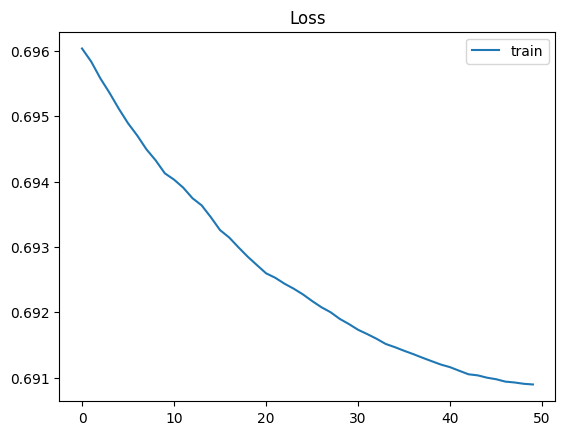

In [315]:
# Assuming 'model' is a Keras model
history = model.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.2)

# Extract loss values from the training history
loss = history.history['loss']

# Now you can plot the loss
plt.title('Loss')
plt.plot(loss, label='train')
plt.legend()
plt.show()
